In [1]:
import pandas as pd
import numpy as np
import math
names =[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
    'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'
]

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", delim_whitespace=True, names=names)

In [2]:
print df.head(6)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
5  0.02985   0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
5     18.7  394.12   5.21   28.7  


In [3]:
print "num samples=%i, num attributes=%i"%(df.shape)

num samples=506, num attributes=14


In [4]:
y = np.array(df["PRICE"])

In [5]:
print "The mean house price is %.2f thousands of dollars.\nOnly %.2f percent are above $40k."%(np.mean(y),np.mean(y < 40)*100)

The mean house price is 22.53 thousands of dollars.
Only 93.87 percent are above $40k.


In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
x = np.array(df["RM"])

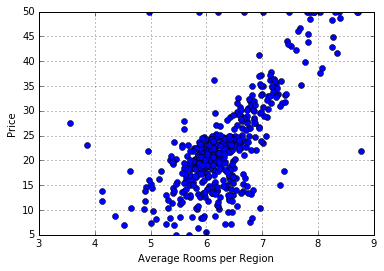

In [8]:
plt.plot(x, y, "o")
plt.xlabel("Average Rooms per Region")
plt.ylabel("Price")
plt.grid(True)

In [9]:
def fit_linear(x,y):
    xm = np.mean(x)
    ym = np.mean(y)
    syy = np.mean((y-ym)**2)
    syx = np.mean((y-ym)*(x-xm))
    sxx = np.mean((x-xm)**2)
    beta1 = syx/sxx
    beta0 = ym - beta1*xm
    rsq = syx / (math.sqrt(sxx) * math.sqrt(syy))
    return beta0, beta1, rsq

In [10]:
print "beta0= %.2f, beta1= %.2f, rsq= %.2f"%(fit_linear(x,y))

beta0= -34.67, beta1= 9.10, rsq= 0.70


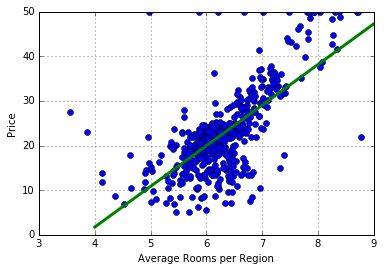

In [11]:
beta0, beta1, rsq = fit_linear(x,y)
xplt = np.array([4,9])          
yplt = beta1*xplt + beta0

plt.plot(x,y,'o')                    # Plot the data points
plt.plot(xplt,yplt,'-',linewidth=3)  # Plot the regression line
plt.xlabel("Average Rooms per Region")
plt.ylabel("Price")
plt.grid(True)

In [12]:
for predictor in names[:-1]:
    print predictor, " %.3f"%((fit_linear(np.array(df[predictor]),y)[2])**2)

CRIM  0.151
ZN  0.130
INDUS  0.234
CHAS  0.031
NOX  0.183
RM  0.484
AGE  0.142
DIS  0.062
RAD  0.146
TAX  0.220
PTRATIO  0.258
B  0.111
LSTAT  0.544
